In [1]:
import pathlib
from fastai.text import *
from data import *
from model import MultiLinearDecoder
from loss import annotation_loss
import pickle
from sklearn.model_selection import train_test_split
%reload_ext autoreload
%autoreload 2

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
directory = pathlib.Path('/data/fakenews/tasks-2-3/train/')
ids, texts, labels = read_data(directory)

In [3]:
ids_train, ids_valid, texts_train, texts_valid, labels_train, labels_valid = train_test_split(ids,texts,labels,test_size=0.15, random_state=42)

In [4]:
vocab = Vocab(pickle.load(open('/data/fakenews/itos_wt103.pkl','rb')))
train = PropagandaDataset(ids_train, texts_train, labels_train, vocab)
valid = PropagandaDataset(ids_valid, texts_valid, labels_valid, vocab)
logging.info("Dataset Created")

Marking  obama as 4
Marking  's as 4
Marking  victims as 4
Marking  very as 3
Marking  deliberately as 3
Marking  ridiculing as 3
Marking  shrugging as 1
Marking  at as 1
Marking  the as 1
Marking  murder as 1
Marking  completely as 1
Marking  collapsed as 1
Marking  shock as 3
Marking  grossly as 3
Marking  disproportionate as 3
Marking  overzealous as 3
Marking  dem as 4
Marking  fundraiser as 4
Marking  unqualified as 4
Marking  our as 2
Marking  nation as 2
Marking  's as 2
Marking  history as 2
Marking  dark as 3
Marking  years as 3
Marking  foolish as 4
Marking  a as 4
Marking  fine as 4
Marking  young as 4
Marking  man as 4
Marking  the as 4
Marking  known as 4
Marking  criminal as 4
Marking  our as 2
Marking  country as 2
Marking  corrupt as 3
Marking  trashing as 3
Marking  our as 2
Marking  republic as 2
Marking  the as 2
Marking  american as 2
Marking  people as 2
Marking  none as 3
Marking  other as 3
Marking  than as 3
Marking  free as 7
Marking  iran as 7
Marking  who as 

Marking  is as 3
Marking  even as 3
Marking  possible as 3
Marking  our as 2
Marking  nation as 2
Marking  gut as 3
Marking  - as 3
Marking  wrenching as 3
Marking  horrific as 3
Marking  ideology as 3
Marking  of as 3
Marking  evil as 3
Marking  everlasting as 3
Marking  damnation as 3
Marking  foul as 3
Marking  willful as 3
Marking  deception as 3
Marking  dumb as 3
Marking  truly as 3
Marking  homophobic as 3
Marking  gross as 3
Marking  dereliction as 3
Marking  of as 3
Marking  duty as 3
Marking  scandalized as 3
Marking  remain as 3
Marking  in as 3
Marking  the as 3
Marking  toilet as 3
Marking  forces as 3
Marking  of as 3
Marking  darkness as 3
Marking  totally as 4
Marking  false as 4
Marking  and as 4
Marking  deliberately as 4
Marking  libelous as 4
Marking  willing as 1
Marking  to as 1
Marking  bet as 1
Marking  the as 1
Marking  guardian as 1
Marking  a as 1
Marking  million as 1
Marking  dollars as 1
Marking  and as 1
Marking  its as 1
Marking  editor as 1
Marking  ’s 

Marking  than as 2
Marking  the as 2
Marking  united as 2
Marking  states as 2
Marking  no as 1
Marking  nation as 1
Marking  has as 1
Marking  a as 1
Marking  more as 1
Marking  talented as 1
Marking  , as 1
Marking  more as 1
Marking  dedicated as 1
Marking  group as 1
Marking  of as 1
Marking  law as 1
Marking  enforcement as 1
Marking  investigators as 1
Marking  and as 1
Marking  prosecutors as 1
Marking  than as 1
Marking  the as 1
Marking  united as 1
Marking  states as 1
Marking  nearly as 1
Marking  constant as 1
Marking  complaints as 1
Marking  from as 1
Marking  trump as 1
Marking  the as 1
Marking  deadliest as 1
Marking  mass as 1
Marking  shooting as 1
Marking  in as 1
Marking  modern as 1
Marking  u.s. as 1
Marking  history as 1
Marking  meaning as 0
Marking  he as 0
Marking  has as 0
Marking  n’t as 0
Marking  bothered as 0
Marking  to as 0
Marking  do as 0
Marking  any as 0
Marking  serious as 0
Marking  investigation as 0
Marking  beyond as 0
Marking  a as 0
Marking 

Marking  . as 4
Marking  ” as 4
Marking  racist as 4
Marking  jewish as 4
Marking  supremacists as 4
Marking  destruction as 3
Marking  wild as 3
Marking  jewish as 4
Marking  extremists as 4
Marking  a as 7
Marking  man as 7
Marking  to as 7
Marking  believe as 7
Marking  in as 7
Marking  ! as 7
Marking  venomous as 3
Marking  satan as 3
Marking  satan as 4
Marking  satan as 3
Marking  satan as 4
Marking  satan as 3
Marking  satan as 4
Marking  arch as 4
Marking  deceiver as 4
Marking  grotesque as 3
Marking  absurd as 3
Marking  “ as 7
Marking  death as 7
Marking  to as 7
Marking  israel as 7
Marking  ” as 7
Marking  wicked as 4
Marking  and as 4
Marking  filth as 4
Marking  - as 4
Marking  ridden as 4
Marking  the as 4
Marking  greatest as 4
Marking  leader as 4
Marking  in as 4
Marking  modern as 4
Marking  western as 4
Marking  history as 4
Marking  grandson as 4
Marking  of as 4
Marking  a as 4
Marking  monkey as 4
Marking  and as 4
Marking  a as 4
Marking  pig as 4
Marking  “ as

Marking  murderer as 3
Marking  of as 3
Marking  a as 3
Marking  foe as 3
Marking  of as 3
Marking  pakistan as 3
Marking  ’s as 3
Marking  blasphemy as 3
Marking  laws as 3
Marking  . as 3
Marking  and as 6
Marking  issue as 6
Marking  an as 6
Marking  official as 6
Marking  ban as 6
Marking  on as 6
Marking  donald as 6
Marking  trump as 6
Marking  from as 6
Marking  entering as 6
Marking  the as 6
Marking  uk as 6
Marking  on as 6
Marking  the as 6
Marking  grounds as 6
Marking  he as 6
Marking  is as 6
Marking  condoning as 6
Marking  fascism as 6
Marking  and as 6
Marking  his as 6
Marking  presence as 6
Marking  is as 6
Marking  “ as 6
Marking  not as 6
Marking  conducive as 6
Marking  to as 6
Marking  the as 6
Marking  public as 6
Marking  good as 6
Marking  ” as 6
Marking  , as 6
Marking  in as 3
Marking  one as 3
Marking  fell as 3
Marking  swoop as 3
Marking  violence as 3
Marking  skyrocketing as 3
Marking  leftist as 4
Marking  social as 4
Marking  engineering as 4
Marking 

Marking  since as 1
Marking  i as 1
Marking  've as 1
Marking  been as 1
Marking  in as 1
Marking  politics as 1
Marking  sham as 3
Marking  boy as 3
Marking  , as 3
Marking  y' as 3
Marking  all as 3
Marking  want as 3
Marking  power as 3
Marking  . as 3
Marking  
 as 3
Marking  boy as 3
Marking  , as 3
Marking  i as 3
Marking  hope as 3
Marking  you as 3
Marking  never as 3
Marking  get as 3
Marking  it as 3
Marking  i as 2
Marking  hope as 2
Marking  the as 2
Marking  american as 2
Marking  people as 2
Marking  can as 2
Marking  see as 2
Marking  through as 2
Marking  this as 2
Marking  sham as 2
Marking  , as 2
Marking  that as 2
Marking  you as 2
Marking  knew as 2
Marking  about as 2
Marking  it as 2
Marking  and as 2
Marking  you as 2
Marking  held as 2
Marking  it as 2
Marking  sham as 3
Marking  been as 3
Marking  through as 3
Marking  hell as 3
Marking  through as 3
Marking  hell as 3
Marking  and as 3
Marking  then as 3
Marking  some as 3
Marking  prayerful as 3
Marking  con

Marking  patriarchs as 4
Marking  and as 4
Marking  our as 4
Marking  american as 4
Marking  forefathers as 4
Marking  to as 3
Marking  submit as 3
Marking  to as 3
Marking  tyranny as 3
Marking  the as 0
Marking  church as 0
Marking  in as 0
Marking  america as 0
Marking  has as 0
Marking  failed as 0
Marking  to as 0
Marking  keep as 0
Marking  the as 0
Marking  commandments as 0
Marking  of as 0
Marking  the as 0
Marking  god as 0
Marking  of as 0
Marking  israel as 0
Marking  instead as 0
Marking  of as 0
Marking  preaching as 0
Marking  out as 0
Marking  against as 0
Marking  sin as 0
Marking  , as 0
Marking  they as 0
Marking  advocate as 0
Marking  for as 0
Marking  that as 0
Marking  which as 0
Marking  god as 0
Marking  clearly as 0
Marking  condemns as 0
Marking  , as 0
Marking  thereby as 0
Marking  making as 0
Marking  war as 0
Marking  against as 0
Marking  god as 0
Marking  ( as 0
Marking  micah as 0
Marking  3:5 as 0
Marking  ) as 0
Marking  , as 0
Marking  which as 0
Ma

Marking  it as 0
Marking  easy as 0
Marking  . as 0
Marking  
 as 0
Marking  i as 0
Marking  am as 0
Marking  not as 0
Marking  saying as 0
Marking  he as 0
Marking  is as 0
Marking  an as 0
Marking  abuser as 0
Marking  . as 0
Marking  
 as 0
Marking  but as 0
Marking  he as 0
Marking  sounds as 0
Marking  like as 0
Marking  one as 0
Marking  relentless as 3
Marking  assault as 3
Marking  risk as 1
Marking  everything as 1
Marking  the as 4
Marking  former as 4
Marking  apostolic as 4
Marking  nuncio as 4
Marking  - as 4
Marking  turned as 4
Marking  - as 4
Marking  whistleblower as 4
Marking  the as 4
Marking  dictator as 4
Marking  pope as 4
Marking  everything as 1
Marking  depends as 1
Marking  on as 1
Marking  it as 1
Marking  by as 0
Marking  what as 0
Marking  possible as 0
Marking  stretch as 0
Marking  of as 0
Marking  the as 0
Marking  imagination as 0
Marking  would as 0
Marking  such as 0
Marking  an as 0
Marking  occupant as 0
Marking  be as 0
Marking  suited as 0
Marking

Marking  hell as 3
Marking  so as 3
Marking  allah as 3
Marking  must as 3
Marking  exterminate as 3
Marking  them as 3
Marking  the as 6
Marking  authors as 6
Marking  say as 6
Marking  that as 6
Marking  islam as 6
Marking  can as 6
Marking  be as 6
Marking  no as 6
Marking  ally as 6
Marking  in as 6
Marking  the as 6
Marking  battle as 6
Marking  “ as 6
Marking  against as 6
Marking  the as 6
Marking  powers as 6
Marking  that as 6
Marking  want as 6
Marking  to as 6
Marking  dominate as 6
Marking  and as 6
Marking  enslave as 6
Marking  the as 6
Marking  world as 6
Marking  ” as 6
Marking  because as 6
Marking  “ as 6
Marking  they as 6
Marking  share as 6
Marking  the as 6
Marking  same as 6
Marking  totalitarian as 6
Marking  logic as 6
Marking  based as 6
Marking  on as 6
Marking  the as 6
Marking  rejection as 6
Marking  of as 6
Marking  the as 6
Marking  kingship as 6
Marking  of as 6
Marking  christ as 6
Marking  the as 3
Marking  utter as 3
Marking  scandal as 3
Marking  of

Marking  of as 3
Marking  human as 3
Marking  rights as 3
Marking  activists as 3
Marking  did as 0
Marking  she as 0
Marking  really as 0
Marking  think as 0
Marking  she as 0
Marking  or as 0
Marking  anyone as 0
Marking  would as 0
Marking  be as 0
Marking  safe as 0
Marking  ? as 0
Marking  
 as 0
Marking  safe as 0
Marking  by as 0
Marking  surrender as 0
Marking  ? as 0
Marking  
 as 0
Marking  when as 0
Marking  did as 0
Marking  they as 0
Marking  ever as 0
Marking  work as 0
Marking  in as 0
Marking  the as 0
Marking  history as 0
Marking  of as 0
Marking  humankind as 0
Marking  ? as 0
Marking  
 as 0
Marking  grim as 3
Marking  and as 3
Marking  increasingly as 3
Marking  common as 3
Marking  reality as 3
Marking  defending as 2
Marking  british as 2
Marking  values as 2
Marking  . as 2
Marking  ” as 2
Marking  
 as 2
Marking  the as 3
Marking  voices as 3
Marking  of as 3
Marking  sanity as 3
Marking  call as 2
Marking  that as 2
Marking  nation as 2
Marking  back as 2
Mark

Marking  ” as 3
Marking  
 as 3
Marking  plague as 1
Marking  such as 3
Marking  a as 3
Marking  reading as 3
Marking  is as 3
Marking  causing as 3
Marking  “ as 3
Marking  rampant as 3
Marking  confusion as 3
Marking  , as 3
Marking  ” as 3
Marking  will as 3
Marking  spread as 3
Marking  “ as 3
Marking  a as 3
Marking  plague as 3
Marking  of as 3
Marking  divorce as 3
Marking  ” as 3
Marking  in as 3
Marking  the as 3
Marking  church as 3
Marking  , as 3
Marking  and as 3
Marking  is as 3
Marking  “ as 3
Marking  alien as 3
Marking  ” as 3
Marking  to as 3
Marking  the as 3
Marking  church as 3
Marking  ’s as 3
Marking  entire as 3
Marking  faith as 3
Marking  and as 3
Marking  tradition as 3
Marking  , as 3
Marking  plague as 1
Marking  of as 1
Marking  divorce as 1
Marking  but as 0
Marking  british as 0
Marking  establishment as 0
Marking  politicians as 0
Marking  have as 0
Marking  done as 0
Marking  everything as 0
Marking  they as 0
Marking  could as 0
Marking  to as 0
Marki

Marking  important as 1
Marking  one as 1
Marking  to as 1
Marking  date as 1
Marking  the as 0
Marking  move as 0
Marking  creates as 0
Marking  some as 0
Marking  big as 0
Marking  questions as 0
Marking  about as 0
Marking  both as 0
Marking  the as 0
Marking  administration as 0
Marking  ’s as 0
Marking  foreign as 0
Marking  policy as 0
Marking  ambitions as 0
Marking  as as 0
Marking  well as 0
Marking  as as 0
Marking  the as 0
Marking  president as 0
Marking  ’s as 0
Marking  relationship as 0
Marking  with as 0
Marking  the as 0
Marking  deep as 0
Marking  state as 0
Marking  is as 3
Marking  perpetually as 3
Marking  meddling as 3
Marking  lashed as 3
Marking  out as 3
Marking  shenanigans as 3
Marking  pompeo as 2
Marking  also as 2
Marking  is as 2
Marking  n’t as 2
Marking  a as 2
Marking  huge as 2
Marking  fan as 2
Marking  of as 2
Marking  calling as 2
Marking  the as 2
Marking  federal as 2
Marking  government as 2
Marking  out as 2
Marking  when as 2
Marking  it as 2


Marking  conveniently as 0
Marking  ignored as 0
Marking  by as 0
Marking  winters as 0
Marking  , as 0
Marking  allen as 0
Marking  and as 0
Marking  shea as 0
Marking  utterly as 1
Marking  devastating as 1
Marking  utterly as 3
Marking  devastating as 3
Marking  muttering as 3
Marking  in as 3
Marking  a as 3
Marking  barely as 3
Marking  comprehensible as 3
Marking  way as 3
Marking  perhaps as 1
Marking  made as 1
Marking  the as 1
Marking  mistake as 1
Marking  of as 1
Marking  sleeping as 1
Marking  in as 1
Marking  the as 1
Marking  same as 1
Marking  bed as 1
Marking  with as 1
Marking  some as 1
Marking  seminarians as 1
Marking  at as 1
Marking  his as 1
Marking  beach as 1
Marking  house as 1
Marking  planned as 3
Marking  sellout as 3
Marking  china as 4
Marking  ’s as 4
Marking  underground as 4
Marking  catholics as 4
Marking  communist as 4
Marking  dictators as 4
Marking  of as 4
Marking  beijing as 4
Marking  very as 3
Marking  grave as 3
Marking  words as 3
Marking  

Marking  the as 1
Marking  human as 1
Marking  element as 1
Marking  of as 1
Marking  the as 1
Marking  church as 1
Marking  in as 1
Marking  practically as 1
Marking  every as 1
Marking  department as 1
Marking  the as 4
Marking  tradition as 4
Marking  - as 4
Marking  hating as 4
Marking  pope as 4
Marking  his as 3
Marking  tyrannical as 3
Marking  reign as 3
Marking  to as 3
Marking  their as 3
Marking  horror as 3
Marking  mount as 1
Marking  under as 1
Marking  this as 1
Marking  reckless as 1
Marking  pope as 1
Marking  to as 1
Marking  an as 1
Marking  unsustainable as 1
Marking  , as 1
Marking  indeed as 1
Marking  apocalyptic as 1
Marking  , as 1
Marking  level as 1
Marking  this as 4
Marking  reckless as 4
Marking  pope as 4
Marking  apocalyptic as 3
Marking  irony as 3
Marking  of as 3
Marking  ironies as 3
Marking  a as 4
Marking  youthful as 4
Marking  vanguard as 4
Marking  of as 3
Marking  what as 3
Marking  is as 3
Marking  ever as 3
Marking  ancient as 3
Marking  but 

Marking  or as 2
Marking  riyadh as 2
Marking  – as 2
Marking  this as 2
Marking  is as 2
Marking  america as 2
Marking  . as 2
Marking  
 as 2
Marking  bumbling as 4
Marking  fbi as 4
Marking  local as 0
Marking  and as 0
Marking  federal as 0
Marking  authorities as 0
Marking  are as 0
Marking  refusing as 0
Marking  to as 0
Marking  fill as 0
Marking  in as 0
Marking  the as 0
Marking  blanks as 0
Marking  . as 0
Marking  protecting as 0
Marking  the as 0
Marking  image as 0
Marking  of as 0
Marking  islam as 0
Marking  , as 0
Marking  not as 0
Marking  protecting as 0
Marking  the as 0
Marking  public as 0
Marking  , as 0
Marking  still as 0
Marking  seems as 0
Marking  to as 0
Marking  be as 0
Marking  the as 0
Marking  most as 0
Marking  important as 0
Marking  priority as 0
Marking  for as 0
Marking  all as 0
Marking  too as 0
Marking  many as 0
Marking  american as 0
Marking  officials as 0
Marking  the as 1
Marking  most as 1
Marking  important as 1
Marking  priority as 1
Mark

 as 0
Marking  if as 0
Marking  you as 0
Marking  need as 0
Marking  further as 0
Marking  clarification as 0
Marking  google as 0
Marking  or as 0
Marking  the as 0
Marking  snhu as 0
Marking  shapiro as 0
Marking  library as 0
Marking  has as 0
Marking  that as 0
Marking  information as 0
Marking  you as 0
Marking  violent as 3
Marking  endemic as 3
Marking  violence as 3
Marking  our as 2
Marking  country as 2
Marking  the as 1
Marking  strongest as 1
Marking  onslaught as 3
Marking  assault as 3
Marking  unconstitutional as 4
Marking  american as 2
Marking  's as 2
Marking  disaster as 3
Marking  deadliest as 1
Marking  wars as 1
Marking  in as 1
Marking  history as 1
Marking  most as 1
Marking  flagrant as 1
Marking  lies as 1
Marking  ever as 1
Marking  dreamed as 1
Marking  up as 1
Marking  flagrant as 3
Marking  lies as 3
Marking  widely as 4
Marking  discredited as 4
Marking  americans as 2
Marking  slaughtered as 3
Marking  at as 3
Marking  all as 3
Marking  tens as 3
Marking

Marking  , as 0
Marking  are as 0
Marking  christians as 0
Marking  to as 0
Marking  submit as 0
Marking  to as 0
Marking  those as 0
Marking  who as 0
Marking  have as 0
Marking  sanctioned as 0
Marking  the as 0
Marking  murder as 0
Marking  of as 0
Marking  the as 0
Marking  innocent as 0
Marking  in as 0
Marking  the as 0
Marking  womb as 0
Marking  those as 4
Marking  who as 4
Marking  have as 4
Marking  sanctioned as 4
Marking  the as 4
Marking  murder as 4
Marking  of as 4
Marking  the as 4
Marking  innocent as 4
Marking  in as 4
Marking  the as 4
Marking  womb as 4
Marking  absolutely as 3
Marking  not as 3
Marking  are as 0
Marking  christians as 0
Marking  to as 0
Marking  submit as 0
Marking  to as 0
Marking  those as 0
Marking  who as 0
Marking  have as 0
Marking  redefined as 0
Marking  marriage as 0
Marking  where as 0
Marking  a as 0
Marking  man as 0
Marking  can as 0
Marking  now as 0
Marking  " as 0
Marking  marry as 0
Marking  " as 0
Marking  a as 0
Marking  man as 0

Marking  story as 0
Marking  today as 0
Marking  that as 0
Marking  it as 0
Marking  knew as 0
Marking  would as 0
Marking  explode as 0
Marking  into as 0
Marking  all as 0
Marking  sorts as 0
Marking  of as 0
Marking  viral as 0
Marking  benefits as 0
Marking  for as 0
Marking  the as 0
Marking  paper as 0
Marking  and as 0
Marking  its as 0
Marking  reporters as 0
Marking  even as 0
Marking  though as 0
Marking  there as 0
Marking  are as 0
Marking  gaping as 0
Marking  holes as 0
Marking  and as 0
Marking  highly as 0
Marking  sketchy as 0
Marking  aspects as 0
Marking  to as 0
Marking  the as 0
Marking  story as 0
Marking  would as 3
Marking  explode as 3
Marking  gaping as 3
Marking  holes as 3
Marking  and as 3
Marking  highly as 3
Marking  sketchy as 3
Marking  aspects as 3
Marking  moreover as 0
Marking  , as 0
Marking  the as 0
Marking  main as 0
Marking  author as 0
Marking  of as 0
Marking  the as 0
Marking  story as 0
Marking  , as 0
Marking  luke as 0
Marking  harding as 

Marking  to as 0
Marking  publish as 0
Marking  the as 0
Marking  truth as 0
Marking  unfortunately as 1
Marking  no as 1
Marking  western as 1
Marking  main as 1
Marking  stream as 1
Marking  media as 1
Marking  can as 1
Marking  any as 1
Marking  longer as 1
Marking  be as 1
Marking  trusted as 1
Marking  to as 1
Marking  publish as 1
Marking  the as 1
Marking  truth as 1
Marking  peddle as 3
Marking  smears as 3
Marking  the as 4
Marking  ' as 4
Marking  enemies as 4
Marking  ' as 4
Marking  of as 4
Marking  the as 4
Marking  ruling as 4
Marking  ' as 4
Marking  western as 4
Marking  interests as 4
Marking  long as 7
Marking  live as 7
Marking  hitler as 7
Marking  , as 7
Marking  to as 7
Marking  death as 7
Marking  the as 7
Marking  jews as 7
Marking  really as 3
Marking  excited as 3
Marking  beaten as 3
Marking  her as 3
Marking  to as 3
Marking  death as 3
Marking  demon as 4
Marking  “ as 4
Marking  unbelievers as 4
Marking  ” as 4
Marking  . as 4
Marking  “ as 3
Marking  infi

Marking  what as 3
Marking  kind as 3
Marking  of as 3
Marking  creature as 3
Marking  kasper as 3
Marking  was as 3
Marking  , as 3
Marking  he as 4
Marking  ’s as 4
Marking  a as 4
Marking  heretic as 4
Marking  trumpeting as 3
Marking  in as 3
Marking  his as 3
Marking  blatant as 3
Marking  heresies as 3
Marking  from as 3
Marking  every as 3
Marking  rooftop as 3
Marking  he as 3
Marking  could as 3
Marking  find as 3
Marking  awesome as 3
Marking  responsibility as 3
Marking  finishing as 3
Marking  touch as 3
Marking  to as 3
Marking  the as 3
Marking  poisoned as 3
Marking  cake as 3
Marking  is as 0
Marking  it as 0
Marking  any as 0
Marking  wonder as 0
Marking  that as 0
Marking  so as 0
Marking  many as 0
Marking  catholics as 0
Marking  have as 0
Marking  become as 0
Marking  disaffected as 0
Marking  whatever as 3
Marking  you as 3
Marking  want as 3
Marking  to as 3
Marking  call as 3
Marking  yourself as 3
Marking  why as 0
Marking  is as 0
Marking  this as 0
Marking  m

Marking  loss as 3
Marking  of as 3
Marking  our as 3
Marking  rights as 3
Marking  million as 3
Marking  ridiculous as 3
Marking  despots as 4
Marking  would as 3
Marking  not as 3
Marking  rest as 3
Marking  until as 3
Marking  the as 3
Marking  frost as 3
Marking  of as 3
Marking  vatican as 3
Marking  ii as 3
Marking  ’s as 3
Marking  perpetual as 3
Marking  winter as 3
Marking  absolutely as 3
Marking  dismal as 3
Marking  death as 3
Marking  spiral as 3
Marking  in as 0
Marking  the as 0
Marking  application as 0
Marking  process as 0
Marking  , as 0
Marking  he as 0
Marking  lied as 0
Marking  to as 0
Marking  military as 0
Marking  recruiters as 0
Marking  about as 0
Marking  a as 0
Marking  recent as 0
Marking  trip as 0
Marking  he as 0
Marking  'd as 0
Marking  taken as 0
Marking  to as 0
Marking  jordan as 0
Marking  in as 0
Marking  a as 0
Marking  failed as 0
Marking  attempt as 0
Marking  to as 0
Marking  make as 0
Marking  contact as 0
Marking  with as 0
Marking  the as

Marking  democrats as 0
Marking  paid as 0
Marking  for as 0
Marking  the as 0
Marking  phony as 0
Marking  and as 0
Marking  discredited as 0
Marking  dossier as 0
Marking  which as 0
Marking  was as 0
Marking  , as 0
Marking  along as 0
Marking  with as 0
Marking  comey as 0
Marking  , as 0
Marking  mccabe as 0
Marking  , as 0
Marking  strzok as 0
Marking  and as 0
Marking  his as 0
Marking  lover as 0
Marking  , as 0
Marking  the as 0
Marking  lovely as 0
Marking  lisa as 0
Marking  page as 0
Marking  , as 0
Marking  used as 0
Marking  to as 0
Marking  begin as 0
Marking  the as 0
Marking  witch as 0
Marking  hunt as 0
Marking  . as 0
Marking  
 as 0
Marking  disgraceful!’ as 0
Marking  the as 4
Marking  phony as 4
Marking  and as 4
Marking  discredited as 4
Marking  dossier as 4
Marking  the as 4
Marking  lovely as 4
Marking  lisa as 4
Marking  page as 4
Marking  the as 4
Marking  witch as 4
Marking  hunt as 4
Marking  disgraceful!’ as 3
Marking  naysayers as 4
Marking  regime as 3

Marking  manafort as 0
Marking  or as 0
Marking  “ as 0
Marking  russians as 0
Marking  ” as 0
Marking  being as 0
Marking  identified as 0
Marking  in as 0
Marking  them as 0
Marking  . as 0
Marking  
 as 0
Marking  it as 0
Marking  did as 0
Marking  not as 0
Marking  refer as 0
Marking  to as 0
Marking  the as 0
Marking  logs as 0
Marking  in as 0
Marking  its as 0
Marking  latest as 0
Marking  story as 0
Marking  russians as 4
Marking  this as 4
Marking  latest as 4
Marking  fabrication as 4
Marking  russians as 4
Marking  russians as 4
Marking  no as 0
Marking  fact as 0
Marking  - as 0
Marking  checking as 0
Marking  
 as 0
Marking  it as 0
Marking  is as 0
Marking  worth as 0
Marking  noting as 0
Marking  it as 0
Marking  should as 0
Marking  be as 0
Marking  vitally as 0
Marking  important as 0
Marking  for as 0
Marking  a as 0
Marking  serious as 0
Marking  publication as 0
Marking  like as 0
Marking  the as 0
Marking  guardian as 0
Marking  to as 0
Marking  ensure as 0
Marking

Marking  attack as 4
Marking  on as 4
Marking  iraq as 4
Marking  the as 1
Marking  largest as 1
Marking  crime as 1
Marking  against as 1
Marking  humanity as 1
Marking  in as 1
Marking  living as 1
Marking  memory as 1
Marking  – as 1
Marking  the as 1
Marking  attack as 1
Marking  on as 1
Marking  iraq as 1
Marking  that as 0
Marking  “ as 0
Marking  humanitarian as 0
Marking  intervention as 0
Marking  ” as 0
Marking  cost as 0
Marking  the as 0
Marking  lives as 0
Marking  of as 0
Marking  many as 0
Marking  hundreds as 0
Marking  of as 0
Marking  thousands as 0
Marking  of as 0
Marking  iraqis as 0
Marking  and as 0
Marking  created as 0
Marking  a as 0
Marking  vacuum as 0
Marking  that as 0
Marking  destabilised as 0
Marking  much as 0
Marking  of as 0
Marking  the as 0
Marking  middle as 0
Marking  east as 0
Marking  , as 0
Marking  sucked as 0
Marking  in as 0
Marking  islamic as 0
Marking  jihadists as 0
Marking  like as 0
Marking  al as 0
Marking  - as 0
Marking  qaeda as 0

Marking  to as 4
Marking  usa as 4
Marking  manafort as 1
Marking  was as 1
Marking  being as 1
Marking  treated as 1
Marking  worse as 1
Marking  than as 1
Marking  al as 1
Marking  capone as 1
Marking  , as 1
Marking  the as 1
Marking  notorious as 1
Marking  prohibition as 1
Marking  - as 1
Marking  era as 1
Marking  chicago as 1
Marking  gangster as 1
Marking  hiding as 3
Marking  in as 3
Marking  plain as 3
Marking  sight as 3
Marking  this as 2
Marking  is as 2
Marking  an as 2
Marking  attempt as 2
Marking  to as 2
Marking  obstruct as 2
Marking  justice as 2
Marking  hiding as 2
Marking  in as 2
Marking  plain as 2
Marking  sight as 2
Marking  . as 2
Marking  
 as 2
Marking  america as 2
Marking  must as 2
Marking  never as 2
Marking  accept as 2
Marking  it as 2
Marking  hiding as 3
Marking  in as 3
Marking  plain as 3
Marking  sight as 3
Marking  unabated as 3
Marking  anger as 3
Marking  one as 4
Marking  of as 4
Marking  trump as 4
Marking  ’s as 4
Marking  earliest as 4
Ma

Marking  was as 3
Marking  outright as 3
Marking  wicked as 3
Marking  . as 3
Marking  this as 3
Marking  sacramental as 3
Marking  reality as 3
Marking  that as 3
Marking  was as 3
Marking  about as 3
Marking  to as 3
Marking  be as 3
Marking  catastrophically as 3
Marking  obscured as 3
Marking  . as 3
Marking  

 as 3
Marking  the as 6
Marking  demonic as 6
Marking  forces as 6
Marking  we as 6
Marking  know as 6
Marking  are as 6
Marking  the as 6
Marking  driving as 6
Marking  force as 6
Marking  behind as 6
Marking  this as 6
Marking  supreme as 6
Marking  moment as 6
Marking  of as 6
Marking  heresy as 6
Marking  and as 6
Marking  destruction as 6
Marking  are as 6
Marking  n’t as 6
Marking  really as 6
Marking  looking as 6
Marking  at as 6
Marking  the as 6
Marking  undermining as 6
Marking  of as 6
Marking  marriage as 6
Marking  as as 6
Marking  their as 6
Marking  primary as 6
Marking  goal as 6
Marking  ; as 6
Marking  they as 6
Marking  want as 6
Marking  to as 6
Marking 

Marking  rigged as 0
Marking  witch as 0
Marking  hunt as 0
Marking  , as 0
Marking  ” as 0
Marking  his as 0
Marking  critics as 0
Marking  “ as 0
Marking  scream as 0
Marking  obstruction as 0
Marking  fight as 3
Marking  back as 3
Marking  the as 4
Marking  rigged as 4
Marking  witch as 4
Marking  hunt as 4
Marking  scream as 3
Marking  obstruction as 3
Marking  agonizing as 3
Marking  the as 3
Marking  eerie as 3
Marking  silence as 3
Marking  the as 4
Marking  leader as 4
Marking  of as 4
Marking  the as 4
Marking  russia as 4
Marking  - as 4
Marking  gate as 4
Marking  frenzy as 4
Marking  the as 4
Marking  left as 4
Marking  forum as 4
Marking  bogus as 3
Marking  smear as 3
Marking  one as 1
Marking  who as 1
Marking  has as 1
Marking  exposed as 1
Marking  a as 1
Marking  system as 1
Marking  that as 1
Marking  threatens as 1
Marking  humanity as 1
Marking  the as 3
Marking  storms as 3
Marking  of as 3
Marking  raw as 3
Marking  truth as 3
Marking  that as 3
Marking  have as 

Marking  utter as 3
Marking  and as 3
Marking  complete as 3
Marking  and as 3
Marking  total as 3
Marking  failure as 3
Marking  the as 3
Marking  verdict as 3
Marking  was as 3
Marking  “ as 3
Marking  horrifying as 3
Marking  . as 3
Marking  
 as 3
Marking  heartbreaking as 3
Marking  death as 3
Marking  disgraceful as 3
Marking  verdict as 3
Marking  enjoyed as 1
Marking  all as 1
Marking  the as 1
Marking  rights as 1
Marking  of as 1
Marking  the as 1
Marking  american as 1
Marking  legal as 1
Marking  system as 1
Marking  , as 1
Marking  “ as 0
Marking  if as 0
Marking  this as 0
Marking  was as 0
Marking  a as 0
Marking  college as 0
Marking  student as 0
Marking  or as 0
Marking  swedish as 0
Marking  kid as 0
Marking  would as 0
Marking  he as 0
Marking  be as 0
Marking  charged as 0
Marking  with as 0
Marking  murder as 0
Marking  ? as 0
Marking  ” as 0
Marking  politically as 3
Marking  correct as 3
Marking  nonsense as 3
Marking  he as 1
Marking  has as 1
Marking  already 

Marking  a as 0
Marking  white as 0
Marking  congressman as 0
Marking  would as 0
Marking  get as 0
Marking  devils as 4
Marking  satanic as 4
Marking  useful as 4
Marking  idiots as 4
Marking  a as 4
Marking  politician as 4
Marking  who as 4
Marking  praised as 4
Marking  a as 4
Marking  racist as 4
Marking  hate as 4
Marking  group as 4
Marking  leader as 4
Marking  and as 4
Marking  discussed as 4
Marking  the as 4
Marking  " as 4
Marking  jewish as 4
Marking  question as 4
Marking  . as 4
Marking  " as 4
Marking  

 as 4
Marking  maga as 7
Marking  “ as 7
Marking  make as 7
Marking  america as 7
Marking  great as 7
Marking  again as 7
Marking  ” as 7
Marking  racial as 3
Marking  slurs as 3
Marking  f**king as 3
Marking  b***h as 3
Marking  bully as 4
Marking  # as 7
Marking  maga as 7
Marking  firestorm as 1
Marking  russian as 4
Marking  dictator as 4
Marking  bad as 3
Marking  the as 1
Marking  most as 1
Marking  serious as 1
Marking  america as 2
Marking  ’s as 2
Marking  grea

Marking  she as 0
Marking  claimed as 0
Marking  were as 0
Marking  at as 0
Marking  the as 0
Marking  alleged as 0
Marking  party as 0
Marking  is as 0
Marking  non as 0
Marking  - as 0
Marking  existent as 0
Marking  the as 4
Marking  kavanaugh as 4
Marking  haters as 4
Marking  the as 0
Marking  only as 0
Marking  problem as 0
Marking  with as 0
Marking  dr. as 0
Marking  friedman as 0
Marking  ’s as 0
Marking  thesis as 0
Marking  is as 0
Marking  that as 0
Marking  ms. as 0
Marking  ford as 0
Marking  has as 0
Marking  apparently as 0
Marking  forgotten as 0
Marking  such as 0
Marking  key as 0
Marking  details as 0
Marking  surrounding as 0
Marking  the as 0
Marking  alleged as 0
Marking  sexual as 0
Marking  assault as 0
Marking  as as 0
Marking  when as 0
Marking  and as 0
Marking  where as 0
Marking  it as 0
Marking  happened as 0
Marking  and as 0
Marking  how as 0
Marking  she as 0
Marking  got as 0
Marking  home as 0
Marking  elitist as 4
Marking  boys’ as 4
Marking  school

Marking  that as 6
Marking  teaches as 6
Marking  young as 6
Marking  muslims as 6
Marking  why as 6
Marking  they as 6
Marking  should as 6
Marking  reject as 6
Marking  the as 6
Marking  understanding as 6
Marking  of as 6
Marking  islam as 6
Marking  taught as 6
Marking  by as 6
Marking  al as 6
Marking  - as 6
Marking  qaeda as 6
Marking  , as 6
Marking  isis as 6
Marking  , as 6
Marking  and as 6
Marking  other as 6
Marking  jihad as 6
Marking  terror as 6
Marking  groups as 6
Marking  an as 4
Marking  “ as 4
Marking  extremist as 4
Marking  cherished as 3
Marking  long as 3
Marking  - as 3
Marking  secret as 3
Marking  records as 3
Marking  trump as 2
Marking  is as 2
Marking  in as 2
Marking  the as 2
Marking  driver as 2
Marking  ’s as 2
Marking  seat as 2
Marking  because as 2
Marking  the as 2
Marking  cia as 2
Marking  can as 2
Marking  not as 2
Marking  afford as 2
Marking  to as 2
Marking  permit as 2
Marking  the as 2
Marking  american as 2
Marking  people as 2
Marking  t

 as 1
Marking  it as 3
Marking  skewers as 3
Marking  them as 3
Marking  . as 3
Marking  they as 4
Marking  call as 4
Marking  julian as 4
Marking  assange as 4
Marking  a as 4
Marking  traitor as 4
Marking  self as 4
Marking  - as 4
Marking  avowed as 4
Marking  communist as 4
Marking  skate as 1
Marking  blissfully as 1
Marking  across as 1
Marking  the as 1
Marking  cold as 1
Marking  war as 1
Marking  stage as 1
Marking  of as 1
Marking  history as 1
Marking  with as 1
Marking  nary as 1
Marking  any as 1
Marking  abuse as 1
Marking  or as 1
Marking  harassment as 1
Marking  at as 1
Marking  all as 1
Marking  do as 0
Marking  n’t as 0
Marking  make as 0
Marking  me as 0
Marking  laugh as 0
Marking  dreadfully as 3
Marking  wrong as 3
Marking  shrouded as 3
Marking  in as 3
Marking  mystery as 3
Marking  . as 3
Marking  the as 2
Marking  cia as 2
Marking  has as 2
Marking  argued as 2
Marking  that as 2
Marking  the as 2
Marking  release as 2
Marking  of as 2
Marking  any as 2
Marki

Marking  happened as 0
Marking  ? as 0
Marking  betraying as 2
Marking  the as 2
Marking  interest as 2
Marking  of as 2
Marking  the as 2
Marking  american as 2
Marking  people as 2
Marking  wishy as 3
Marking  - as 3
Marking  washy as 3
Marking  lacking as 3
Marking  push as 3
Marking  , as 3
Marking  zeal as 3
Marking  and as 3
Marking  enthusiasm as 3
Marking  the as 3
Marking  rotten as 3
Marking  inner as 3
Marking  workings as 3
Marking  startling as 3
Marking  the as 3
Marking  harmful as 3
Marking  and as 3
Marking  divisive as 3
Marking  views as 3
Marking  fails as 0
Marking  to as 0
Marking  explain as 0
Marking  why as 0
Marking  he as 0
Marking  met as 0
Marking  with as 0
Marking  him as 0
Marking  . as 0
Marking  but as 0
Marking  we as 0
Marking  've as 0
Marking  seen as 0
Marking  that as 0
Marking  before as 0
Marking  . as 0
Marking  
 as 0
Marking  so as 0
Marking  it as 0
Marking  likely as 0
Marking  does as 0
Marking  n't as 0
Marking  represent as 0
Marking  h

Marking  the as 0
Marking  law as 0
Marking  changed as 0
Marking  . as 0
Marking  
 as 0
Marking  the as 0
Marking  only as 0
Marking  thing as 0
Marking  that as 0
Marking  changed as 0
Marking  was as 0
Marking  the as 0
Marking  administration as 0
Marking  a as 3
Marking  game as 3
Marking  changer as 3
Marking  ghost as 4
Marking  guns as 4
Marking  hypocrisy as 3
Marking  # as 7
Marking  neveragain as 7
Marking  aggressively as 3
Marking  and as 0
Marking  just as 0
Marking  what as 0
Marking  kind as 0
Marking  of as 0
Marking  policies as 0
Marking  are as 0
Marking  we as 0
Marking  talking as 0
Marking  about as 0
Marking  ? as 0
Marking  geniuses as 4
Marking  unconstitutional as 3
Marking  and as 3
Marking  unlawful as 3
Marking  laws as 3
Marking  " as 7
Marking  take as 7
Marking  the as 7
Marking  guns as 7
Marking  first as 7
Marking  and as 7
Marking  then as 7
Marking  due as 7
Marking  process as 7
Marking  " as 7
Marking  our as 2
Marking  our as 2
Marking  our as 

Marking  mentions as 0
Marking  qur’an as 0
Marking  9:29 as 0
Marking  , as 0
Marking  which as 0
Marking  commands as 0
Marking  muslims as 0
Marking  to as 0
Marking  wage as 0
Marking  war as 0
Marking  against as 0
Marking  jews as 0
Marking  and as 0
Marking  christians as 0
Marking  and as 0
Marking  subjugate as 0
Marking  them as 0
Marking  as as 0
Marking  inferiors as 0
Marking  under as 0
Marking  the as 0
Marking  rule as 0
Marking  of as 0
Marking  sharia as 0
Marking  wills as 0
Marking  is as 0
Marking  no as 0
Marking  more as 0
Marking  trustworthy as 0
Marking  when as 0
Marking  he as 0
Marking  deals as 0
Marking  with as 0
Marking  the as 0
Marking  question as 0
Marking  of as 0
Marking  violence as 0
Marking  in as 0
Marking  the as 0
Marking  qur’an as 0
Marking  wills as 0
Marking  does as 0
Marking  n’t as 0
Marking  give as 0
Marking  any as 0
Marking  source as 0
Marking  for as 0
Marking  it as 0
Marking  he as 0
Marking  ignores as 0
Marking  the as 0
Mar

INFO:root:Dataset Created


killed as 1
Marking  gun as 1
Marking  control as 1
Marking  i as 1
Marking  barely as 1
Marking  put as 1
Marking  a as 1
Marking  million as 1
Marking  bucks as 1
Marking  into as 1
Marking  this as 1
Marking  and as 1
Marking  i as 1
Marking  got as 1
Marking  you as 1
Marking  the as 1
Marking  second as 1
Marking  amendment as 1
Marking  forever as 1
Marking  what as 0
Marking  has as 0
Marking  the as 0
Marking  nra as 0
Marking  done as 0
Marking  for as 0
Marking  you as 0
Marking  lately as 0
Marking  the as 2
Marking  dna as 2
Marking  of as 2
Marking  our as 2
Marking  culture as 2
Marking  is as 2
Marking  preserved as 2
Marking  . as 2
Marking  
 as 2
Marking  this as 2
Marking  is as 2
Marking  the as 2
Marking  first as 2
Marking  pillar as 2
Marking  in as 2
Marking  the as 2
Marking  internet as 2
Marking  gun as 2
Marking  culture as 2
Marking  of as 2
Marking  tomorrow as 2
Marking  , as 2
Marking  and as 2
Marking  it as 2
Marking  is as 2
Marking  permanent as 2
Ma

In [5]:
dev_dir = pathlib.Path('/data/fakenews/tasks-2-3/dev/')
ids_dev, texts_dev, labels_dev = read_data(dev_dir)
dev = PropagandaDataset(ids_dev, texts_dev, labels_dev, vocab)

In [6]:
test_dir = pathlib.Path('/data/fakenews/tasks-2-3/test/')
ids_test, texts_test, labels_test = read_data(test_dir)
test = PropagandaDataset(ids_test, texts_test, labels_test, vocab)

In [7]:
db = DataBunch(DataLoader(train, batch_size=3, shuffle=True), DataLoader(valid,batch_size=4),
               collate_fn=partial(pad_collate_concat, pad_idx=1))
logging.info("Databunch Created")

INFO:root:Databunch Created


In [9]:
vocab_sz = len(vocab.itos)
emb_sz = 400
n_hid = 600
n_layers = 2
pad_token = 1
bptt = 100
model = SequentialRNN(MultiBatchRNNCore(bptt, 9135, vocab_sz, emb_sz, n_hid, n_layers, pad_token, bidir=True, hidden_p=0.3),
                      MultiLinearDecoder(len(PROPAGANDA_TYPES), 3, emb_sz, 0.15))

In [10]:
weights = torch.load('/data/fakenews/lstm_wt103.pth')
weights_emb = {
    'encoder.weight': weights['0.encoder.weight'],
    'encoder_dp.emb.weight': weights['0.encoder_dp.emb.weight']
}

In [11]:
from metrics import recall, precision
callbacks = [accuracy ] + [recall(i, PROPAGANDA_TYPES[i]) for i in range(len(PROPAGANDA_TYPES))] + [precision(i, PROPAGANDA_TYPES[i]) for i in range(len(PROPAGANDA_TYPES))]
learner = RNNLearner(db, model, loss_func=annotation_loss,metrics=callbacks, split_func=rnn_classifier_split )
#learner.load_encoder('/data/fakenews/lstm_wt103_enc')

In [12]:
learner.model[0].load_state_dict(weights_emb, strict=False)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


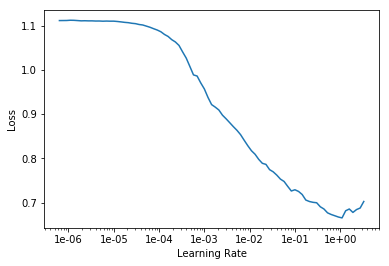

In [12]:
learner.lr_find()
learner.recorder.plot()

In [13]:
learner.fit_one_cycle(3, slice(1e-2))

epoch,train_loss,valid_loss,accuracy,recall_Doubt,"recall_Exaggeration,Minimisation",recall_Flag-Waving,recall_Loaded_Language,"recall_Name_Calling,Labeling",recall_Red_Herring,recall_Reductio_ad_hitlerum,recall_Slogans,precision_Doubt,"precision_Exaggeration,Minimisation",precision_Flag-Waving,precision_Loaded_Language,"precision_Name_Calling,Labeling",precision_Red_Herring,precision_Reductio_ad_hitlerum,precision_Slogans
1,0.525738,0.488699,0.574574,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.476070,0.462065,0.574574,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.459384,0.459672,0.574574,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
learner.fit_one_cycle(3, slice(5e-3))

epoch,train_loss,valid_loss,accuracy,recall_Doubt,"recall_Exaggeration,Minimisation",recall_Flag-Waving,recall_Loaded_Language,"recall_Name_Calling,Labeling",recall_Red_Herring,recall_Reductio_ad_hitlerum,recall_Slogans,precision_Doubt,"precision_Exaggeration,Minimisation",precision_Flag-Waving,precision_Loaded_Language,"precision_Name_Calling,Labeling",precision_Red_Herring,precision_Reductio_ad_hitlerum,precision_Slogans
1,0.447431,0.445858,0.574574,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.437738,0.436213,0.574239,0.000000,0.000000,0.000000,0.010495,0.030716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.121117,0.144002,0.000000,0.000000,0.000000
3,0.428034,0.427672,0.573902,0.000000,0.000000,0.000000,0.021068,0.035653,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111239,0.138341,0.000000,0.000000,0.000000


In [15]:
learner.save('vl_0.4276')

In [16]:
learner.fit_one_cycle(5, slice(5e-3))

epoch,train_loss,valid_loss,accuracy,recall_Doubt,"recall_Exaggeration,Minimisation",recall_Flag-Waving,recall_Loaded_Language,"recall_Name_Calling,Labeling",recall_Red_Herring,recall_Reductio_ad_hitlerum,recall_Slogans,precision_Doubt,"precision_Exaggeration,Minimisation",precision_Flag-Waving,precision_Loaded_Language,"precision_Name_Calling,Labeling",precision_Red_Herring,precision_Reductio_ad_hitlerum,precision_Slogans
1,0.424222,0.429158,0.545428,0.237324,0.000000,0.000000,0.200164,0.081513,0.000000,0.000000,0.000000,0.014658,0.000000,0.000000,0.027701,0.119490,0.000000,0.000000,0.000000
2,0.420505,0.434349,0.574221,0.000000,0.000000,0.000000,0.011613,0.037128,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103450,0.116670,0.000000,0.000000,0.000000
3,0.423956,0.419194,0.560013,0.120637,0.000000,0.000000,0.231596,0.261130,0.000000,0.000000,0.000000,0.039723,0.000000,0.000000,0.029454,0.024893,0.000000,0.000000,0.000000
4,0.399100,0.398993,0.571351,0.014244,0.000000,0.000000,0.160702,0.142111,0.000000,0.000000,0.000000,0.047142,0.000000,0.000000,0.089826,0.163837,0.000000,0.000000,0.000000
5,0.391779,0.394879,0.567163,0.026262,0.000852,0.026314,0.293014,0.217397,0.000000,0.000000,0.001623,0.042166,0.030303,0.115909,0.028712,0.103217,0.000000,0.000000,0.011364


In [17]:
learner.save('vl_0.3948')

In [18]:
learner.fit_one_cycle(5, slice(5e-3))

epoch,train_loss,valid_loss,accuracy,recall_Doubt,"recall_Exaggeration,Minimisation",recall_Flag-Waving,recall_Loaded_Language,"recall_Name_Calling,Labeling",recall_Red_Herring,recall_Reductio_ad_hitlerum,recall_Slogans,precision_Doubt,"precision_Exaggeration,Minimisation",precision_Flag-Waving,precision_Loaded_Language,"precision_Name_Calling,Labeling",precision_Red_Herring,precision_Reductio_ad_hitlerum,precision_Slogans
1,0.376527,0.394659,0.568754,0.009013,0.012706,0.037678,0.238978,0.252460,0.000000,0.000000,0.006494,0.066533,0.060846,0.121384,0.031395,0.031310,0.000000,0.000000,0.015152
2,0.390175,0.403898,0.571818,0.034899,0.000000,0.015936,0.098920,0.106351,0.000000,0.000000,0.001623,0.041345,0.000000,0.060606,0.129121,0.106072,0.000000,0.000000,0.007576
3,0.386469,0.379292,0.562545,0.062623,0.068591,0.079253,0.390347,0.272301,0.000000,0.000000,0.004870,0.056871,0.044491,0.079853,0.027545,0.031245,0.000000,0.000000,0.011364
4,0.369552,0.374764,0.558050,0.119884,0.030936,0.079253,0.383023,0.295542,0.000000,0.000000,0.001623,0.011760,0.058149,0.082917,0.027449,0.027981,0.000000,0.000000,0.005682
5,0.353061,0.373826,0.558758,0.116325,0.036559,0.082094,0.353525,0.289516,0.000000,0.000000,0.004870,0.011698,0.056326,0.075287,0.027823,0.028589,0.000000,0.000000,0.011364


In [43]:
#learner.save('vl_0.3738')
learner.load('vl_0.3948')

RNNLearner(data=DataBunch;

Train: <data.PropagandaDataset object at 0x7f8435f05470>;

Valid: <data.PropagandaDataset object at 0x7f8435a013c8>;

Test: None, model=SequentialRNN(
  (0): MultiBatchRNNCore(
    (encoder): Embedding(60002, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(60002, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 300, batch_first=True, bidirectional=True)
      )
      (1): WeightDropout(
        (module): LSTM(600, 200, batch_first=True, bidirectional=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
    )
  )
  (1): MultiLinearDecoder(
    (decoders): ModuleList(
      (0): LinearDecoder(
        (decoder): Linear(in_features=400, out_features=3, bias=True)
        (output_dp): RNNDropout()
      )
      (1): LinearDecoder(
        (decoder): Linear(in_features=400, out_features=3, bias=True)
     

In [20]:
learner.fit_one_cycle(5, slice(5e-3))

epoch,train_loss,valid_loss,accuracy,recall_Doubt,"recall_Exaggeration,Minimisation",recall_Flag-Waving,recall_Loaded_Language,"recall_Name_Calling,Labeling",recall_Red_Herring,recall_Reductio_ad_hitlerum,recall_Slogans,precision_Doubt,"precision_Exaggeration,Minimisation",precision_Flag-Waving,precision_Loaded_Language,"precision_Name_Calling,Labeling",precision_Red_Herring,precision_Reductio_ad_hitlerum,precision_Slogans
1,0.363715,0.375720,0.566553,0.045314,0.031693,0.076412,0.278774,0.266812,0.000000,0.000000,0.006494,0.075476,0.059770,0.068554,0.030928,0.029946,0.000000,0.000000,0.006061
2,0.366189,0.387633,0.545169,0.298597,0.017353,0.158809,0.200493,0.207706,0.000000,0.000000,0.006494,0.017153,0.084754,0.048971,0.040279,0.128336,0.000000,0.000000,0.006993
3,0.371498,0.370773,0.547257,0.208586,0.087238,0.133709,0.423694,0.288057,0.000000,0.000000,0.001623,0.015615,0.044438,0.055527,0.026285,0.026536,0.000000,0.000000,0.005682
4,0.346473,0.365542,0.551958,0.197355,0.092868,0.136000,0.338661,0.277284,0.000000,0.000000,0.008117,0.015000,0.020162,0.070882,0.030664,0.029733,0.000000,0.000000,0.007576
5,0.338286,0.366166,0.555631,0.152655,0.072284,0.134011,0.341070,0.281338,0.000000,0.000000,0.008117,0.012705,0.059327,0.071473,0.029689,0.027859,0.000000,0.000000,0.008117


In [21]:
learner.save('vl_0.3661')

In [36]:
learner.fit_one_cycle(10, slice(1e-3))

epoch,train_loss,valid_loss,accuracy,recall_Bandwagon,recall_Causal_Oversimplification,recall_Doubt,"recall_Exaggeration,Minimisation",recall_Flag-Waving,recall_Loaded_Language,"recall_Name_Calling,Labeling",recall_Red_Herring,recall_Reductio_ad_hitlerum,recall_Slogans,precision_Bandwagon,precision_Causal_Oversimplification,precision_Doubt,"precision_Exaggeration,Minimisation",precision_Flag-Waving,precision_Loaded_Language,"precision_Name_Calling,Labeling",precision_Red_Herring,precision_Reductio_ad_hitlerum,precision_Slogans
1,0.105742,0.164745,0.572658,0.000000,0.000000,0.060732,0.000000,0.006394,0.231993,0.131140,0.000000,0.000000,0.001623,0.000000,0.000000,0.018690,0.000000,0.051136,0.130320,0.108045,0.000000,0.000000,0.007576
2,0.113641,0.164977,0.572735,0.000000,0.000223,0.061127,0.000000,0.012481,0.221086,0.136950,0.000000,0.000000,0.003247,0.000000,0.022727,0.020984,0.000000,0.072727,0.136739,0.107663,0.000000,0.000000,0.011364
3,0.109581,0.165983,0.572521,0.000000,0.000223,0.067202,0.000000,0.012887,0.214060,0.125187,0.000000,0.000000,0.003247,0.000000,0.022727,0.018653,0.000000,0.033144,0.150732,0.122163,0.000000,0.000000,0.011364
4,0.110108,0.164202,0.572706,0.000000,0.000000,0.060596,0.000000,0.008766,0.240369,0.134418,0.000000,0.000000,0.003247,0.000000,0.000000,0.019569,0.000000,0.027273,0.132030,0.113616,0.000000,0.000000,0.011364
5,0.117226,0.161080,0.571795,0.000000,0.000481,0.078043,0.000000,0.015728,0.217123,0.134545,0.000000,0.000000,0.003247,0.000000,0.030303,0.020136,0.000000,0.059659,0.152316,0.133077,0.000000,0.000000,0.011364
6,0.112502,0.162932,0.572806,0.000000,0.000000,0.060823,0.000000,0.012887,0.235649,0.154436,0.000000,0.000000,0.003247,0.000000,0.000000,0.022233,0.000000,0.050000,0.134759,0.118904,0.000000,0.000000,0.011364
7,0.112249,0.163650,0.572437,0.000000,0.000223,0.066252,0.000000,0.018975,0.235947,0.154158,0.000000,0.000000,0.003247,0.000000,0.022727,0.020357,0.000000,0.055871,0.137749,0.116448,0.000000,0.000000,0.009091
8,0.109462,0.163107,0.572271,0.000000,0.000223,0.066886,0.000316,0.022222,0.242902,0.156910,0.000000,0.000000,0.003247,0.000000,0.022727,0.020443,0.022727,0.043939,0.134297,0.117879,0.000000,0.000000,0.009091
9,0.110428,0.163245,0.572258,0.000000,0.000223,0.068373,0.000000,0.018975,0.239145,0.157470,0.000000,0.000000,0.003247,0.000000,0.022727,0.020489,0.000000,0.044192,0.138782,0.117416,0.000000,0.000000,0.009091
10,0.109824,0.163264,0.572262,0.000000,0.000223,0.068373,0.000316,0.018975,0.238115,0.156437,0.000000,0.000000,0.003247,0.000000,0.022727,0.020476,0.022727,0.042045,0.138626,0.117464,0.000000,0.000000,0.009091


In [30]:
learner.fit_one_cycle(10, slice(5e-3))

epoch,train_loss,valid_loss,accuracy,recall_Bandwagon,recall_Black-and-White_Fallacy,recall_Causal_Oversimplification,recall_Doubt,"recall_Exaggeration,Minimisation",recall_Flag-Waving,recall_Loaded_Language,"recall_Name_Calling,Labeling",recall_Red_Herring,recall_Reductio_ad_hitlerum,recall_Repetition,recall_Slogans,recall_Straw_Men,recall_Thought-terminating_Cliches,precision_Bandwagon,precision_Black-and-White_Fallacy,precision_Causal_Oversimplification,precision_Doubt,"precision_Exaggeration,Minimisation",precision_Flag-Waving,precision_Loaded_Language,"precision_Name_Calling,Labeling",precision_Red_Herring,precision_Reductio_ad_hitlerum,precision_Repetition,precision_Slogans,precision_Straw_Men,precision_Thought-terminating_Cliches
1,0.080905,0.157295,0.573685,0.000000,0.012727,0.027478,0.043982,0.019902,0.053464,0.280005,0.199456,0.000000,0.000000,0.000000,0.004870,0.000000,0.000000,0.000000,0.022727,0.049509,0.007926,0.101831,0.119835,0.149426,0.148633,0.000000,0.000000,0.000000,0.022727,0.000000,0.000000
2,0.080972,0.159344,0.573703,0.000000,0.016364,0.036595,0.046951,0.017258,0.077399,0.232381,0.192243,0.000000,0.001623,0.000000,0.003247,0.000000,0.000000,0.000000,0.022727,0.049449,0.008391,0.093635,0.122564,0.158841,0.163608,0.000000,0.022727,0.000000,0.022727,0.000000,0.000000
3,0.084392,0.157057,0.573587,0.000000,0.018788,0.047141,0.060529,0.013064,0.053870,0.209332,0.190710,0.000000,0.014610,0.000000,0.011634,0.000000,0.000000,0.000000,0.022727,0.050811,0.009647,0.073359,0.095407,0.152400,0.169021,0.000000,0.020455,0.000000,0.037879,0.000000,0.000000
4,0.081321,0.161895,0.573111,0.000000,0.007273,0.035757,0.079412,0.009764,0.051497,0.169333,0.207012,0.000000,0.001623,0.000000,0.000000,0.000000,0.000000,0.000000,0.022727,0.051497,0.011139,0.092803,0.096294,0.165530,0.155995,0.000000,0.005682,0.000000,0.000000,0.000000,0.000000
5,0.082300,0.160834,0.572855,0.000000,0.021212,0.051722,0.069698,0.013578,0.069823,0.284848,0.213951,0.000000,0.001623,0.000000,0.008117,0.000000,0.000000,0.000000,0.022727,0.054251,0.009476,0.077778,0.119289,0.151981,0.147327,0.000000,0.022727,0.000000,0.022727,0.000000,0.000000
6,0.084371,0.155917,0.573385,0.000000,0.018182,0.032461,0.068706,0.047983,0.069823,0.219255,0.222468,0.000000,0.006494,0.000000,0.004870,0.000000,0.000000,0.000000,0.022727,0.072296,0.045429,0.167781,0.108977,0.151909,0.145422,0.000000,0.022727,0.000000,0.022727,0.000000,0.000000
7,0.078880,0.161304,0.573187,0.000000,0.021818,0.045392,0.070623,0.034743,0.036987,0.329275,0.219820,0.000000,0.001623,0.000000,0.004870,0.000000,0.000000,0.000000,0.022727,0.056813,0.011007,0.144968,0.072917,0.152904,0.159460,0.000000,0.022727,0.000000,0.022727,0.000000,0.000000
8,0.076343,0.160039,0.573244,0.000000,0.021212,0.040701,0.071472,0.049242,0.051597,0.305765,0.214846,0.000000,0.012987,0.000000,0.008117,0.000000,0.000000,0.000000,0.022727,0.060281,0.010842,0.152861,0.083832,0.157091,0.162419,0.000000,0.022727,0.000000,0.022727,0.000000,0.000000
9,0.075951,0.158397,0.573033,0.000000,0.021212,0.044465,0.072789,0.056096,0.058459,0.306552,0.222996,0.000000,0.016234,0.000000,0.009740,0.000000,0.000000,0.000000,0.022727,0.055582,0.011105,0.171630,0.108685,0.160434,0.155660,0.000000,0.020661,0.000000,0.022727,0.000000,0.000000
10,0.073765,0.158277,0.573044,0.000000,0.021515,0.044562,0.072789,0.054685,0.058459,0.306432,0.220528,0.000000,0.016234,0.000000,0.008117,0.000000,0.000000,0.000000,0.022727,0.055352,0.011085,0.171702,0.108685,0.161866,0.157546,0.000000,0.020661,0.000000,0.022727,0.000000,0.000000


In [22]:
def pred(ds, idx):
    model.eval()
    preds = model(torch.LongTensor(ds[idx][0]).unsqueeze(0).cuda())[0][0]
    labels = preds.argmax(-1)
    return preds, labels
    

In [44]:
scores = []

ds = test

for i in range(len(ds)):
    preds,labels = pred(ds, i)
    scores.append(labels)
    if (labels > 0).nonzero().sum() > 0:
        print(i)
        nz = (labels>0).nonzero()
        print(PROPAGANDA_TYPES[nz[0,1]])
        print(nz[:5])
        print(ds.tokens[i][ max(0,nz[0,0] -5):nz[0,0]+5])
        print(ds.tokens[i][nz[0,0]])
        

0
Loaded_Language
tensor([[1, 3],
        [2, 0],
        [4, 3],
        [7, 3],
        [9, 0]], device='cuda:0')
['the', 'plague', 'is', 'airborne', 'and', 'it']
plague
1
Doubt
tensor([[0, 0],
        [0, 1],
        [0, 2],
        [0, 3],
        [0, 4]], device='cuda:0')
['america', "'s", 'immigration', 'voice', '.']
america
2
Loaded_Language
tensor([[ 1,  3],
        [11,  3],
        [11,  4],
        [13,  4],
        [14,  3]], device='cuda:0')
['sore', 'loser', ':', 'stacey', 'abrams', 'ends']
loser
3
Loaded_Language
tensor([[0, 3],
        [0, 4],
        [1, 3],
        [6, 0],
        [9, 3]], device='cuda:0')
['black', 'death', 'warning', ':', 'the']
black
4
Loaded_Language
tensor([[15,  3],
        [16,  3],
        [52,  3],
        [53,  3],
        [53,  4]], device='cuda:0')
['article', ',', '“', 'what', 'the', 'red', 'pill', 'means', 'for', 'radicals']
red
5
Loaded_Language
tensor([[23,  3],
        [24,  3],
        [33,  3],
        [44,  0],
        [45,  0]], d

44
Loaded_Language
tensor([[223,   3],
        [224,   3],
        [226,   3],
        [361,   0],
        [362,   3]], device='cuda:0')
['ca', "n't", 'act', 'like', 'a', 'child', 'and', 'keep', 'your', 'pass']
child
45
Doubt
tensor([[38,  0],
        [73,  3],
        [73,  4],
        [74,  3],
        [74,  4]], device='cuda:0')
['says', 'he', 'plans', 'to', 'do', 'everything', 'in', 'his', 'power', 'to']
everything
46
Doubt
tensor([[ 0,  0],
        [ 1,  0],
        [ 2,  0],
        [ 3,  0],
        [16,  0]], device='cuda:0')
['how', 'do', 'you', 'like', 'paying']
how
47
Loaded_Language
tensor([[ 44,   3],
        [191,   3],
        [209,   3],
        [209,   4],
        [210,   0]], device='cuda:0')
['negotiated', 'on', 'behalf', 'of', 'his', 'boss', 'barack', 'obama', '.', '\n']
boss
48
Loaded_Language
tensor([[ 3,  3],
        [ 3,  4],
        [22,  4],
        [24,  3],
        [45,  3]], device='cuda:0')
['texan', 'behind', '3d', '-', 'printed', 'guns', 'vows', 'legal']

Doubt
tensor([[0, 0],
        [0, 1],
        [0, 2],
        [0, 3],
        [0, 4]], device='cuda:0')
['america', "'s", 'immigration', 'voice', '.']
america
88
Loaded_Language
tensor([[ 56,   3],
        [ 57,   3],
        [ 57,   4],
        [ 61,   4],
        [139,   0]], device='cuda:0')
['shootings', ',', 'are', 'those', 'of', 'his', 'grandson', '.', '\n', 'abdul']
his
89
Doubt
tensor([[11,  0],
        [11,  3],
        [12,  3],
        [13,  3],
        [33,  3]], device='cuda:0')
['democratic', 'party', 'does', 'n’t', 'believe', 'my', 'story', '\n\n', 'karen', 'monahan']
my
90
Loaded_Language
tensor([[ 8,  3],
        [ 8,  4],
        [ 9,  3],
        [ 9,  4],
        [10,  0]], device='cuda:0')
[':', 'officials', 'warn', 'that', 'the', '“', 'black', 'death', '”', 'plague']
“
91
Loaded_Language
tensor([[ 8,  3],
        [ 9,  3],
        [24,  3],
        [28,  3],
        [71,  3]], device='cuda:0')
['it', 'is', '‘', 'inevitable’', 'the', 'plague', 'becomes', 'resistant

In [50]:
from output import output_preds, output_single
res_df = output_preds(ds, scores)

In [54]:
res_df.head(150)[-50:]

,end,id,propaganda,span,start
3,1551,763114850,Doubt,"(most, corrupt)",1539
4,1616,763114850,Doubt,"(most, corrupt)",1604
5,1681,763114850,Doubt,"(most, corrupt)",1669
6,2828,763114850,Doubt,"(how, people, think)",2812
7,2988,763114850,Doubt,(very),2984
8,3189,763114850,Doubt,(so),3187
9,4655,763114850,Doubt,(terrible),4647
10,5640,763114850,Doubt,"(most, elite)",5630
11,6638,763114850,Doubt,"(that, this)",6629
12,74,763114850,Loaded_Language,"(Red, Pill)",66


In [46]:
res_df['propaganda'].value_counts()

Loaded_Language              2416
Doubt                        1083
Name_Calling,Labeling         751
Exaggeration,Minimisation     107
Flag-Waving                    82
Reductio_ad_hitlerum           13
Slogans                        11
Name: propaganda, dtype: int64

In [47]:

res_df.to_csv('/tmp/test-2.csv', sep='\t', columns=['id', 'propaganda', 'start','end'], header=False,index=False)

In [56]:
!subl /tmp/dev.csv


In [58]:
from predict import predict_task_2

t2df = predict_task_2(dev, model, vocab )

In [59]:
t2df

,id,propaganda,sentence_id
0,785801366,non-propaganda,1
1,785801366,propaganda,2
2,785801366,propaganda,3
3,785801366,non-propaganda,4
4,785801366,propaganda,5
5,785801366,propaganda,6
6,785801366,non-propaganda,7
7,785801366,non-propaganda,8
8,785801366,non-propaganda,9
9,785801366,non-propaganda,10


In [62]:
t2df.to_csv('/tmp/dev-task2.csv', sep='\t', index=False, columns=['id','sentence_id', 'propaganda'], header=False)